In [1]:
# libraries for data visualization 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# libraries for data modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, precision_recall_curve,\
f1_score 
import warnings
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

## Load Dataset

In [2]:
pd.set_option("display.max_columns",None)
data = pd.read_csv('C:/Users/rudra/Downloads/startup_data.csv')
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,01-01-2007,NaN,04-01-2009,01-01-2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,01-01-2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,18-03-2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,01-01-2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,08-01-2010,10-01-2012,08-01-2010,04-01-2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


## Data description

In [3]:
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,01-01-2007,NaN,04-01-2009,01-01-2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,01-01-2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,18-03-2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,01-01-2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,08-01-2010,10-01-2012,08-01-2010,04-01-2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [5]:
data.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [6]:
data.shape

(923, 49)

In [7]:
num_data = data.select_dtypes(include = 'number')
num_data.head()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,1005,42.358880,-71.056820,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0
1,204,37.238916,-121.973718,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1
2,1001,32.901049,-117.192656,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1
3,738,37.320309,-122.050040,1,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1
4,1002,37.779281,-122.419236,0,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1


In [8]:
cat_data = data.select_dtypes(exclude = 'number')
cat_data.head()

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id,status
0,CA,92101,c:6669,San Diego,NaN,Bandsintown,01-01-2007,NaN,04-01-2009,01-01-2010,CA,music,c:6669,acquired
1,CA,95032,c:16283,Los Gatos,NaN,TriCipher,01-01-2000,NaN,2/14/2005,12/28/2009,CA,enterprise,c:16283,acquired
2,CA,92121,c:65620,San Diego,San Diego CA 92121,Plixi,18-03-2009,NaN,3/30/2010,3/30/2010,CA,web,c:65620,acquired
3,CA,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,01-01-2002,NaN,2/17/2005,4/25/2007,CA,software,c:42668,acquired
4,CA,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,08-01-2010,10-01-2012,08-01-2010,04-01-2012,CA,games_video,c:65806,closed


In [9]:
# convert the status column into 0 and 1, 1 = acquired and 0 = closed
data["status"] = np.where(data["status"] == "acquired" , 1 , 0)
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,01-01-2007,NaN,04-01-2009,01-01-2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,01-01-2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,18-03-2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,01-01-2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,08-01-2010,10-01-2012,08-01-2010,04-01-2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0


In [10]:
#drop labels feature beacuase it is same as status
data = data.drop(["labels"] , axis=1)
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,01-01-2007,NaN,04-01-2009,01-01-2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,01-01-2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,18-03-2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,01-01-2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,08-01-2010,10-01-2012,08-01-2010,04-01-2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0


## Exploratory data analysis

In [11]:
#includes only numeric data
data.describe(include = 'number')

,Unnamed: 0,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
count,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,0.089924,0.045504,0.221018,0.165764,0.156013,0.08559,0.079090,0.067172,0.056338,0.027086,0.036836,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317,0.646804
std,333.585431,3.741497,22.394167,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,0.286228,0.208519,0.415158,0.372070,0.363064,0.27991,0.270025,0.250456,0.230698,0.162421,0.188462,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052,0.478222
min,1.000000,25.752358,-122.756956,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000
50%,577.000000,37.779281,-118.374037,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,1.000000
75%,866.500000,40.730646,-77.214731,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,1.000000
max,1153.000000,59.335232,18.057121,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000


In [12]:
#includes columns with string type data
data.describe(include = ["O"])

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id
count,923,923,923,923,430,923,923,335,923,923,922,923,923
unique,35,382,922,221,252,922,217,202,585,680,35,35,922
top,CA,94107,c:28482,San Francisco,San Francisco CA 94105,Redwood Systems,01-01-2003,06-01-2013,01-01-2008,01-01-2008,CA,software,c:28482
freq,488,30,2,128,12,2,55,25,18,11,487,153,2


In [13]:
# columns with missing values
null_data = pd.DataFrame(data.isnull().sum() , columns=["Missing Values"])
null_data["Percentage Missing"] = (data.isna().sum() / len(data) * 100)
null_data = null_data[null_data["Missing Values"] > 0]
null_data = null_data.sort_values("Missing Values" , ascending=False)
null_data

,Missing Values,Percentage Missing
closed_at,588,63.705309
Unnamed: 6,493,53.412784
age_first_milestone_year,152,16.468039
age_last_milestone_year,152,16.468039
state_code.1,1,0.108342


### Handling columns with missing values

#### 1) "Unnamed: 6" column

In [14]:
data[["Unnamed: 6"]].head()

,Unnamed: 6
0,NaN
1,NaN
2,San Diego CA 92121
3,Cupertino CA 95014
4,San Francisco CA 94105


In [15]:
# it contains entries that are a combination of city, state_code, zip_code
data['Unnamed: 6'] = data.apply(lambda x: (x.city) + " " + (x.state_code) + " " + (x.zip_code), axis = 1)
data[['Unnamed: 6']].head()

,Unnamed: 6
0,San Diego CA 92101
1,Los Gatos CA 95032
2,San Diego CA 92121
3,Cupertino CA 95014
4,San Francisco CA 94105


#### 2) "closed_at" column

In [16]:
data[["closed_at"]].head()

,closed_at
0,NaN
1,NaN
2,NaN
3,NaN
4,10-01-2012


In [17]:
# since all the dates in the data are before 31/12/2013.
data['closed_at'] = data['closed_at'].fillna(value = "31/12/2013")
data[["closed_at"]].head()

,closed_at
0,31/12/2013
1,31/12/2013
2,31/12/2013
3,31/12/2013
4,10-01-2012


#### 3) "age_first_milestone_year" & "age_last_milestone_year" columns

In [18]:
data[["age_first_milestone_year" , "age_last_milestone_year"]].head()

,age_first_milestone_year,age_last_milestone_year
0,4.6685,6.7041
1,7.0055,7.0055
2,1.4575,2.2055
3,6.0027,6.0027
4,0.0384,0.0384


In [19]:
# these columns shows the age when the startup reached their first and last milestone. So the missing values show that the 
# startup didn't reach any milestone. So, missing value can be replaced with 0.
data['age_first_milestone_year'] = data['age_first_milestone_year'].fillna(value = 0)
data['age_last_milestone_year'] = data['age_last_milestone_year'].fillna(value = 0)

#### 4) "state_code.1" column

In [20]:
#comparing "state_code" and "state_code.1" columns
count = 0
for i, j in data.iterrows():
    if j['state_code'] == j['state_code.1']:
        count = count + 1
print(count)

922


In [21]:
# this shows that both the columns have same values except the one column with missing value. So, "state_code.1" can be dropped
data.drop(["state_code.1"] , axis=1 , inplace=True)

## Data visualization

In [22]:
# Correlation between all attributes
data.corr()

,Unnamed: 0,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
Unnamed: 0,1.000000,0.054726,0.023292,-0.004507,-0.116533,-0.130166,-0.123438,-0.079950,-0.118456,-0.064169,-0.000338,-0.042446,0.033485,0.043021,-0.021463,0.002249,0.001367,0.007076,-0.028279,0.042640,-0.075131,0.065020,-0.026132,0.004224,-0.040929,0.006243,-0.040057,0.134044,-0.076568,-0.135289,-0.090922,-0.081123,0.026713,0.026019,-0.068721
latitude,0.054726,1.000000,0.368475,-0.046868,-0.041692,-0.041030,-0.017674,-0.039198,-0.000659,-0.072941,0.017708,-0.417471,0.205747,0.318015,-0.423888,0.338590,-0.001656,-0.009799,0.035917,-0.002291,0.054575,-0.033160,0.041628,0.012956,-0.033905,-0.039656,0.031045,0.028891,-0.033072,-0.011801,-0.057762,-0.018825,-0.018176,0.032675,0.046560
longitude,0.023292,0.368475,1.000000,-0.014158,-0.000148,-0.054850,-0.083744,-0.073197,0.022447,0.017970,-0.016420,-0.780122,0.449871,0.441031,0.066199,0.257801,0.024857,-0.022024,0.013527,-0.003244,0.039998,-0.025569,0.043092,0.028075,0.021244,-0.046560,0.024852,0.102001,-0.066288,-0.067017,-0.042309,-0.042854,-0.045191,-0.091913,-0.036092
age_first_funding_year,-0.004507,-0.046868,-0.014158,1.000000,0.762382,0.382395,0.236958,-0.187817,-0.155478,0.046350,-0.295894,-0.010800,-0.128102,0.020279,0.032838,0.081031,0.116797,-0.166601,-0.054658,-0.047326,-0.071336,-0.063787,-0.071580,0.190653,-0.012596,0.115649,0.168140,-0.345985,-0.293081,-0.060532,0.033388,0.121338,0.114363,0.050638,-0.075637
age_last_funding_year,-0.116533,-0.041692,-0.000148,0.762382,1.000000,0.529763,0.436369,0.073080,0.385999,0.116371,-0.122905,0.006190,-0.143312,0.096325,0.014965,0.029313,0.116670,-0.216886,0.010886,0.006887,-0.056837,-0.078674,-0.108662,0.189788,0.029712,0.091918,0.351044,-0.354470,-0.099762,0.258928,0.317469,0.312340,0.122893,0.200727,0.073731
age_first_milestone_year,-0.130166,-0.041030,-0.054850,0.382395,0.529763,1.000000,0.813272,0.310615,0.203653,0.063757,0.198468,0.042312,-0.063721,0.061964,-0.007891,-0.041542,0.105210,-0.037349,-0.002441,0.027732,0.003546,-0.065086,-0.066627,-0.008895,0.037784,-0.016923,0.071394,-0.198481,0.073806,0.195873,0.168593,0.224239,0.052237,0.168606,0.250163
age_last_milestone_year,-0.123438,-0.017674,-0.083744,0.236958,0.436369,0.813272,1.000000,0.411711,0.257549,0.086555,0.543103,0.065809,-0.048850,0.052560,-0.011815,-0.074783,0.034156,0.040042,0.053354,0.045515,0.015474,-0.022773,-0.077904,-0.073885,0.019947,-0.059105,0.042486,-0.142864,0.170414,0.251696,0.208067,0.211145,0.072443,0.212903,0.358600
relationships,-0.079950,-0.039198,-0.073197,-0.187817,0.073080,0.310615,0.411711,1.000000,0.358883,0.093790,0.513835,0.105754,0.049912,-0.004689,-0.012779,-0.157843,-0.087759,0.042207,0.034052,0.089621,0.110820,0.016851,-0.031035,-0.068248,0.078289,-0.073963,-0.028938,-0.060625,0.317130,0.285015,0.259842,0.207488,0.115061,0.222207,0.360434
funding_rounds,-0.118456,-0.000659,0.022447,-0.155478,0.385999,0.203653,0.257549,0.358883,1.000000,0.115800,0.230162,0.010258,0.007431,0.079527,-0.018921,-0.062794,-0.017969,-0.091871,0.104287,0.078839,-0.000867,-0.003951,-0.051723,0.018321,0.028304,-0.012769,0.334832,0.010606,0.260598,0.444454,0.440923,0.323620,0.043044,0.259345,0.206049
funding_total_usd,-0.064169,-0.072941,0.017970,0.046350,0.116371,0.063757,0.086555,0.093790,0.115800,1.000000,0.012056,-0.027545,-0.024488,-0.005667,-0.003988,0.057764,-0.018932,-0.030426,0.107388,-0.010946,-0.015013,-0.011830,-0.010790,0.026082,-0.001829,-0.011932,0.010060,-0.059650,-0.023721,0.020119,0.045405,0.045146,0.046250,0.048978,0.040176


<AxesSubplot:>

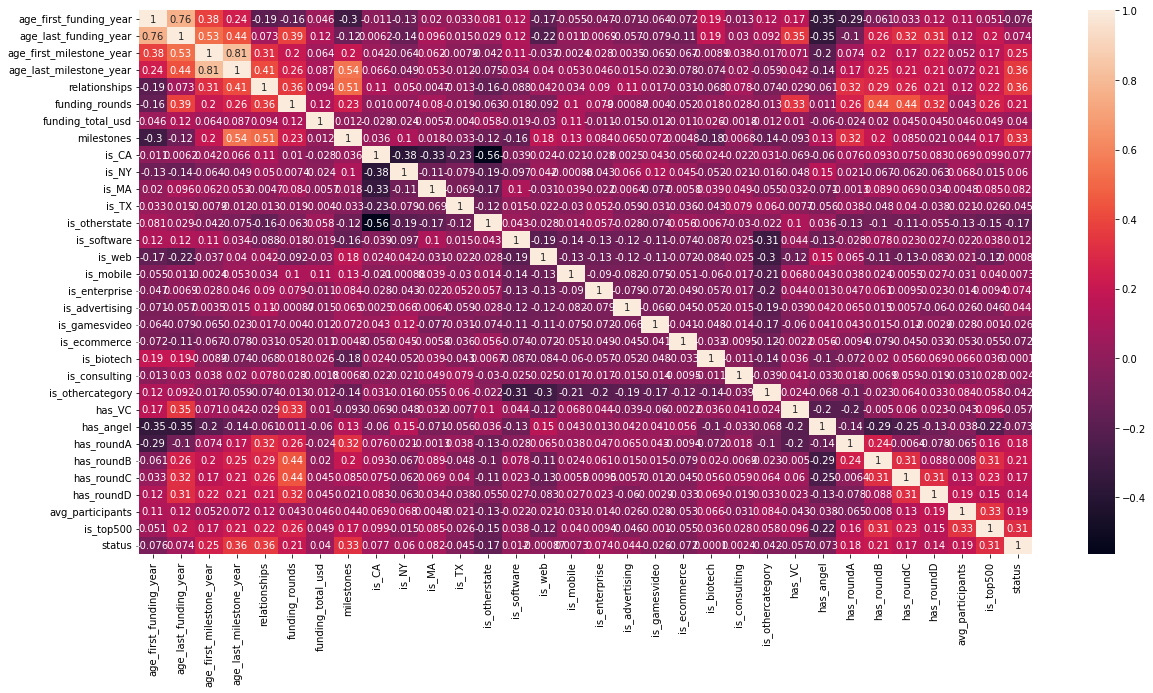

In [23]:
# Using heatmap to visualize the correlation
# not considering the attributes related to city, state, name, labels
cols = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships',
        'funding_rounds','funding_total_usd','milestones','is_CA','is_NY','is_MA','is_TX','is_otherstate','is_software',
        'is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting',
        'is_othercategory','has_VC','has_angel','has_roundA','has_roundB','has_roundC','has_roundD','avg_participants',
        'is_top500','status']
q1_df = pd.DataFrame(data, columns = cols)
plt.figure(figsize = (20,10))
sns.heatmap(q1_df.corr(), annot = True)

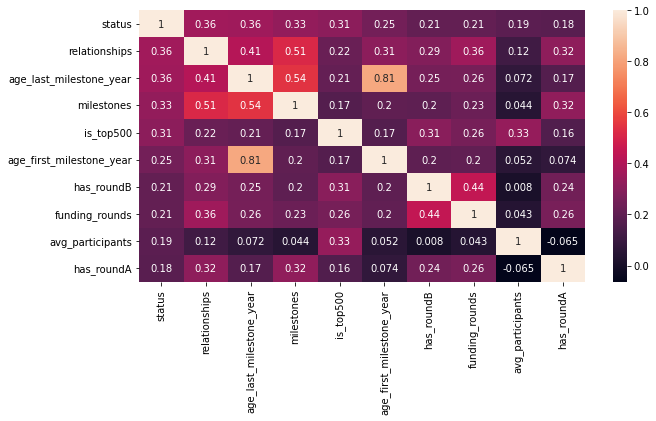

In [24]:
# using the 10 columns with highest correlation with "status" attribute
columns = data[cols].corr()
columns =columns.nlargest(10, 'status')['status'].index
cm = np.corrcoef(data[columns].values.T)
plt.figure(figsize = (10,5))
sns.heatmap(cm,annot=True,yticklabels=columns.values,xticklabels = columns.values)
plt.show()

<AxesSubplot:xlabel='age_first_milestone_year', ylabel='age_last_milestone_year'>

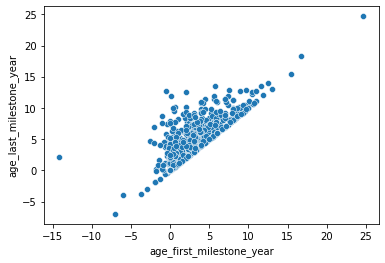

In [25]:
# "age_first_milestone_year" vs "age_last_milestone_year"
sns.scatterplot(x = data["age_first_milestone_year"] , y = data["age_last_milestone_year"])

In [26]:
# number of startups founded vs the year in which they were founded
countData = data["founded_at"]
countData = countData.apply(lambda x: '' + x[6:]).value_counts(normalize = False)
print(countData)

2006    107
2007    104
2005    102
2008     87
2009     82
2010     72
2004     71
2000     65
2003     64
2002     58
2001     41
2011     31
1999     11
2012     10
1998      4
2013      3
1996      3
1997      3
1984      1
1992      1
1995      1
1990      1
1985      1
Name: founded_at, dtype: int64


<AxesSubplot:xlabel='year', ylabel='number of startups'>

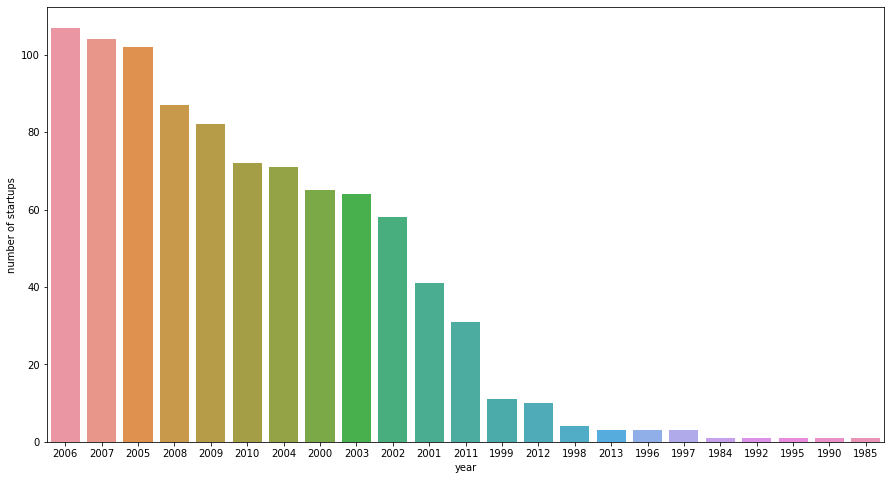

In [27]:
countData = countData.to_frame().reset_index().rename(columns={"index": "year", "founded_at": "number of startups"})
plt.figure(figsize = (15,8))
sns.barplot(x = "year", y = "number of startups", data = countData)

In [28]:
# number of startups closed vs the year in which they were closed
countData = data["closed_at"]
countData = countData.apply(lambda x: '' + x[6:]).value_counts(normalize = False)
print(countData)

2013    681
2012    111
2011     49
2010     33
2009     27
2008     15
2007      3
2001      2
009       1
2005      1
Name: closed_at, dtype: int64


<AxesSubplot:xlabel='year', ylabel='number of startups'>

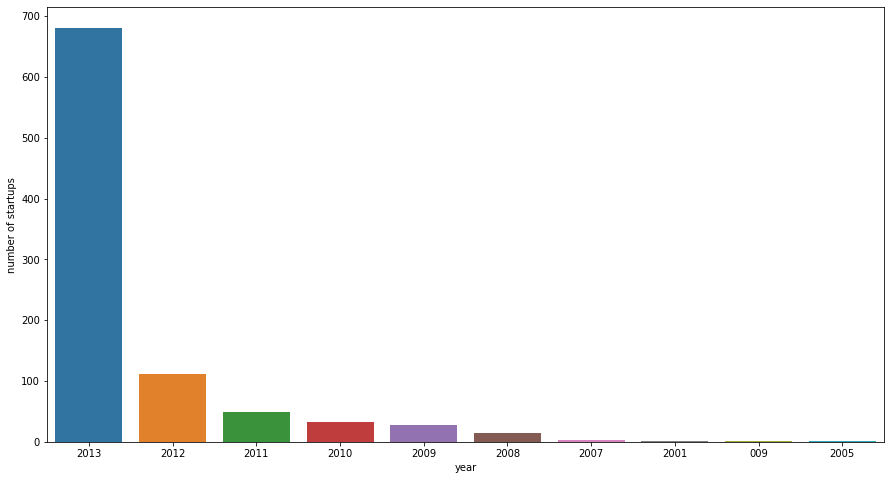

In [29]:
countData = countData.to_frame().reset_index().rename(columns={"index": "year", "closed_at": "number of startups"})
plt.figure(figsize = (15,8))
sns.barplot(x = "year", y = "number of startups", data = countData)

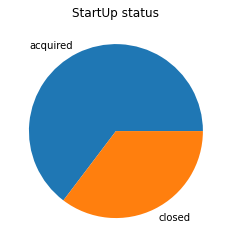

number of acquired startups =  597
number of closed startups =  326


In [30]:
#number of startups acquired and closed
acq_sp = data[(data["status"] == True)]
close_sp = data[(data["status"] == False)]

x = [acq_sp.shape[0], close_sp.shape[0]]
y = ['acquired', 'closed']
plt.title("StartUp status")
plt.show(plt.pie(x , labels=y))

print("number of acquired startups = ", acq_sp.shape[0])
print("number of closed startups = ", close_sp.shape[0])

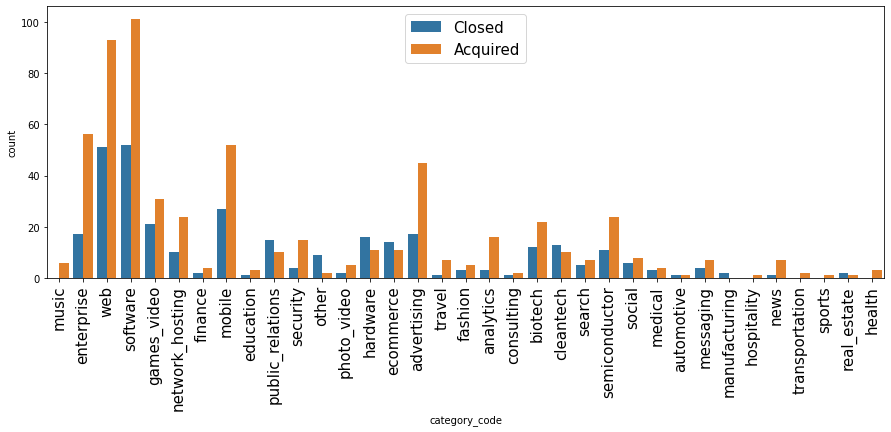

In [31]:
#number of startups based on stutus and category
plt.figure(figsize = (15,5))
sns.countplot(x='category_code', hue = 'status', data = data)
plt.xticks(fontsize = 15, rotation = 90)
plt.legend(['Closed','Acquired'], prop = {'size': 15})
plt.show()

## Data Modeling 

In [32]:
# from sklearn.model_selection import train_test_split
data = data.drop(['state_code'],axis=1)
data = data.drop(['id'],axis=1)
data = data.drop(['Unnamed: 6'],axis=1)
data = data.drop(['category_code'],axis=1)
data = data.drop(['object_id'],axis=1)
data = data.drop(['zip_code'],axis=1)
data = data.drop(['founded_at'],axis=1)
data = data.drop(['closed_at'],axis=1)
data = data.drop(['first_funding_at'],axis=1)
data = data.drop(['last_funding_at'],axis=1)
data = data.drop(['city'],axis=1)
data = data.drop(['name'],axis=1)
data = data.drop(['Unnamed: 0'],axis=1)
data = data.drop(['latitude','longitude'],axis=1)
data = data.drop(['relationships'],axis=1)
# X contains all the dataset except the target column ('status')
X = data.drop('status', axis=1)
# Y contains only the target variable ('status')
Y = data['status']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

### Random Forest Classifier

Training Accuracy : 1.0
Testing Accuracy : 0.7945945945945946


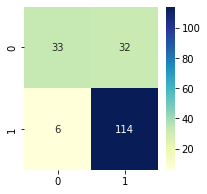

              precision    recall  f1-score   support

           0       0.85      0.51      0.63        65
           1       0.78      0.95      0.86       120

    accuracy                           0.79       185
   macro avg       0.81      0.73      0.75       185
weighted avg       0.80      0.79      0.78       185

-------------------------------------------------------------
ROC Curves              = 0.7288461538461538
Precision-Recall Curves = 0.8816271751203257


In [33]:
warnings.filterwarnings('ignore')
# from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train,y_train)


y_pred_rf = rf.predict(X_test)

print("Training Accuracy :", rf.score(X_train, y_train))
print("Testing Accuracy :", rf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_rf)
print(cr)


print("-------------------------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
Precision_Recall_rfs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_rfs)

### XGBoost Classifier

[23:45:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy : 1.0
Testing Accuracy : 0.7675675675675676


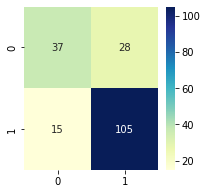

              precision    recall  f1-score   support

           0       0.71      0.57      0.63        65
           1       0.79      0.88      0.83       120

    accuracy                           0.77       185
   macro avg       0.75      0.72      0.73       185
weighted avg       0.76      0.77      0.76       185

-------------------------------------------------------------
ROC Curves              = 0.7221153846153846
Precision-Recall Curves = 0.8727773826458037


In [34]:
# from xgboost import XGBClassifier

#train
xgb = XGBClassifier()

xgb.fit(X_train,y_train)

#predict
y_predicted_xgb = xgb.predict(X_test)

print("Training Accuracy :", xgb.score(X_train, y_train))
print("Testing Accuracy :", xgb.score(X_test, y_test))

#eval
cm = confusion_matrix(y_test, y_predicted_xgb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_xgb)
print(cr)

print("-------------------------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_xgb)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_xgb)
f1 = f1_score(y_test, y_predicted_xgb)
Precision_Recall_xgb = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_xgb)

### AdaBoost Classifier

Training Accuracy : 0.8211382113821138
Testing Accuracy : 0.7783783783783784


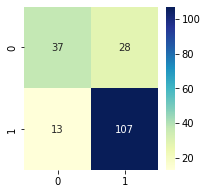

              precision    recall  f1-score   support

           0       0.74      0.57      0.64        65
           1       0.79      0.89      0.84       120

    accuracy                           0.78       185
   macro avg       0.77      0.73      0.74       185
weighted avg       0.77      0.78      0.77       185

roc_auc 0.7304487179487179
-------------------------------------------------------------
ROC Curves              = 0.7304487179487179
Precision-Recall Curves = 0.8772647647647649


In [35]:
# from sklearn.ensemble import AdaBoostClassifier
#train
ada = AdaBoostClassifier()


ada.fit(X_train,y_train)

#predict
y_predicted_ab = ada.predict(X_test)

print("Training Accuracy :", ada.score(X_train, y_train))
print("Testing Accuracy :", ada.score(X_test, y_test))

#eval
cm = confusion_matrix(y_test, y_predicted_ab)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_predicted_ab)
print(cr)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_ab)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("roc_auc",roc_auc)

print("-------------------------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted_ab)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted_ab)
f1 = f1_score(y_test, y_predicted_ab)
Precision_Recall_abs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_abs)